# Qiskit Method Sparse State Gate Count

This note book will demonstrate the Qiskit's built-in quantum state preparation method `.initialize()` will require $O(2^n)$ CNOT gates and $O(2^n)$ single qubit rotation gates, which is asymptotically greater than the other method implemented in this Repo that requires $O(nd)$ multi-control rotation gates.

Note that the gate level optimization (e.g., romoving removing zero rotations and double cnots) are already done in  the Qiskit method (https://qiskit.org/documentation/stubs/qiskit.circuit.library.StatePreparation.html#statepreparation). So this additional cost is perhaps only caused by algorithm design.

In [1]:
import numpy as np
import random

from helper_functions import *

# Import Qiskit libraries
from qiskit import QuantumCircuit
from qiskit.execute_function import execute
from qiskit import BasicAer
from qiskit import transpile
qiskit_backend = BasicAer.get_backend('statevector_simulator')

We can generate a 7-qubit sparse state with 5 non-zero elements (you can also toggle the `n` and `d` values around to play with other states).

In [152]:
random.seed(10)
n = 7
d = 5
# generate a random array of size d with element values chosen from [0, 2^n] to index the sparse state's non-zero value locations
random_d_length_array = sorted(random.sample(range(2 ** n), d))
print(random_d_length_array)
# generate a sparse state based on the non-zero value location index array above
sparse_state_vector = generate_normalized_real_sparse_array(n, random_d_length_array)
print(sparse_state_vector)

[3, 8, 52, 109, 123]
[0.         0.         0.         0.42392984 0.         0.
 0.         0.         0.45024641 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.25433257 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

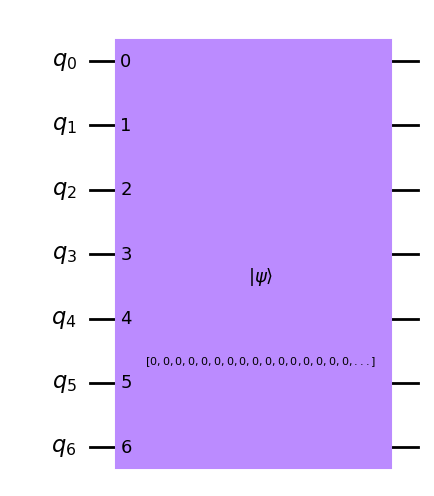

In [153]:
qc = QuantumCircuit(n)
qc.initialize(w_like_state, range(n))

qc.draw(output='mpl')

In [156]:
# decompose the circuit to make sure everything is in the SU(2), CNOT form
decomposed_qc = qc.decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose().decompose()
print(dict(decomposed_qc.count_ops()))

{'u': 127, 'cx': 126, 'reset': 7}


We can see that 127 single qubit gates and 126 CNOT gates are required, which is approximately equal to $2^7 = 128$

In [146]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [36]:
import sys
print(sys.version)

3.10.11 (main, May 17 2023, 14:30:36) [Clang 14.0.6 ]
